In [1]:
import pandas as pd                          # import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np



In [2]:
df= pd.read_csv('creditcard.csv')                 #Load the dataset from the csv file using pandas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: xlabel='Time', ylabel='Density'>

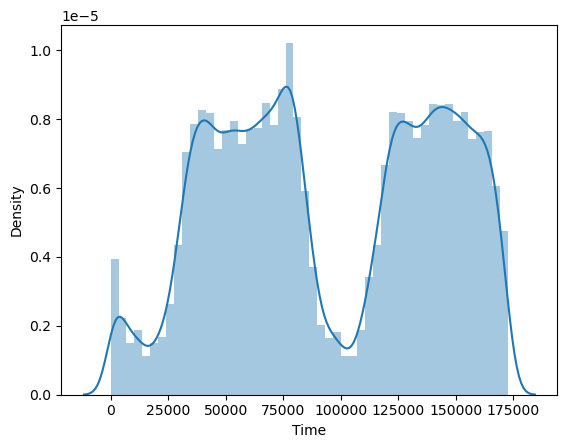

In [6]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

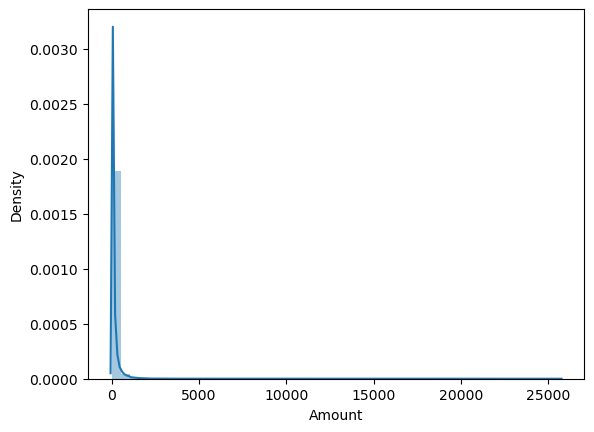

In [7]:
sns.distplot(df['Amount'])

<Axes: xlabel='V1', ylabel='Density'>

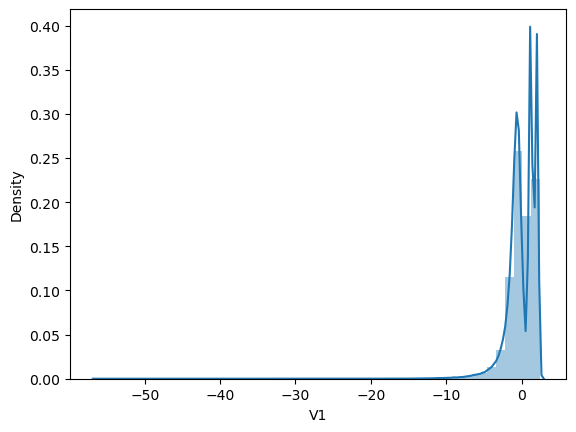

In [8]:
sns.distplot(df['V1'])

<Axes: xlabel='V2', ylabel='Density'>

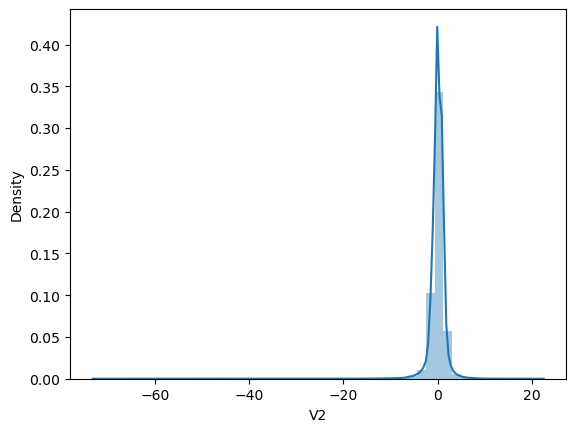

In [9]:
sns.distplot(df['V2'])

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
Fraud=df['Class'].value_counts()[1]
Fraud

492

In [12]:
Nonfraud= df['Class'].value_counts()[0]
Nonfraud

284315

<Axes: >

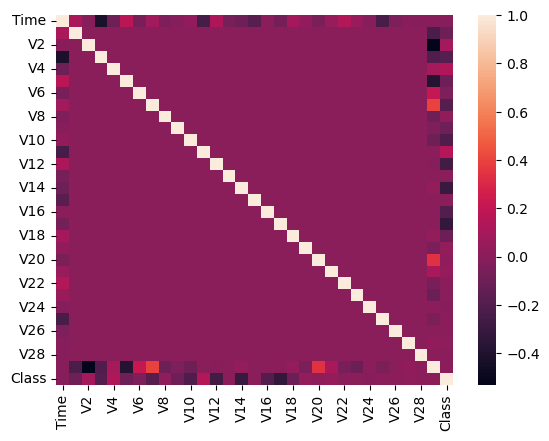

In [13]:
sns.heatmap(df.corr())

In [14]:
x=df.iloc[:,: -1]
y= df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.2, random_state= 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf= RandomForestClassifier(max_depth =6, n_estimators =10)

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10)

In [20]:


print('Training Set Score : ', rf.score(x_train, y_train))
print('Testing Set Score  : ', rf.score(x_test, y_test))

Training Set Score :  0.9995567161886371
Testing Set Score  :  0.9993679997191109


In [21]:
pred_test = rf.predict(x_test)
pred_train = rf.predict(x_train)


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gn = GaussianNB()

In [24]:
gn.fit(x_train,y_train)

GaussianNB()

In [25]:
print('Training Set Score : ', gn.score(x_train, y_train))
print('Testing Set Score  : ', gn.score(x_test, y_test))

Training Set Score :  0.9935175228773947
Testing Set Score  :  0.9930128857835048


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [27]:
pd.DataFrame(y_test).value_counts()

Class
0        56864
1           98
dtype: int64

In [28]:
pd.DataFrame(pred_test).value_counts()

0    56888
1       74
dtype: int64

In [29]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[56858,     6],
       [   30,    68]], dtype=int64)

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


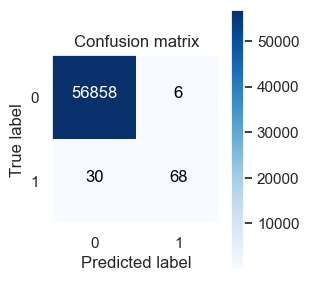

In [31]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [32]:
f1_score(y_test, pred_test)

0.7906976744186046

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.69      0.79        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_test)

0.022779599066188514